# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [5]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

file_path = './motorbike_ambulance_calls.csv'
data = pd.read_csv(file_path)
data.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


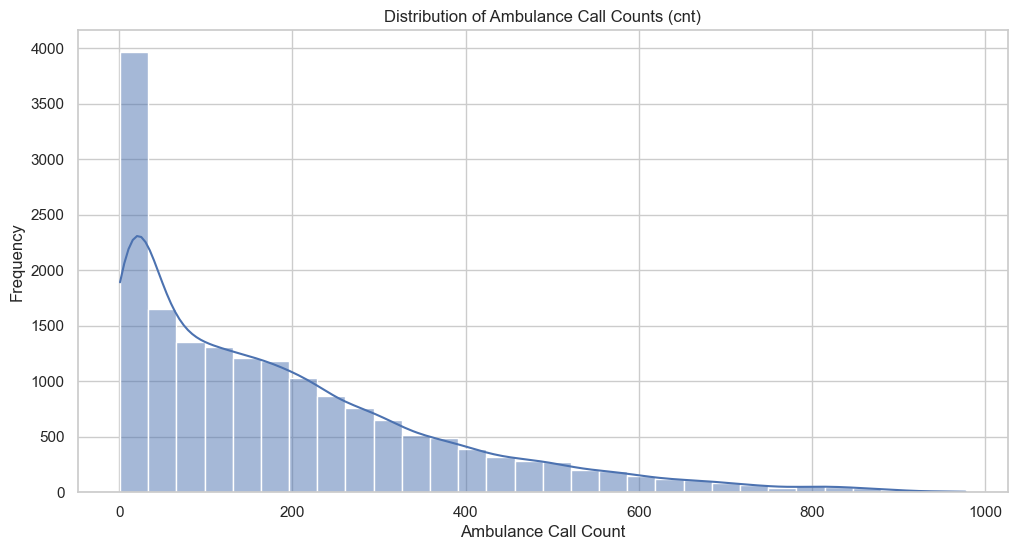

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

missing_values = data.isnull().sum()

sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Ambulance Call Counts (cnt)')
plt.xlabel('Ambulance Call Count')
plt.ylabel('Frequency')
plt.show()

missing_values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
          'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

X_encoded = pd.get_dummies(X, columns=['season', 'weekday', 'weathersit'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)

linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_results = {
    "Linear Regression": (mse_linear, r2_linear),
    "Decision Tree Regressor": (mse_tree, r2_tree),
    "Gradient Boosting Regressor": (mse_gb, r2_gb),
    "Random Forest Regressor": (mse_rf, r2_rf)
}
print(mse_results)

{'Linear Regression': (np.float64(19017.673435524663), 0.39941808323742156), 'Decision Tree Regressor': (np.float64(3371.163909666283), 0.8935379719579064), 'Gradient Boosting Regressor': (np.float64(4521.915424023924), 0.8571970098232138), 'Random Forest Regressor': (np.float64(1766.6503162934666), 0.9442088309694716)}


In [8]:
from sklearn.model_selection import GridSearchCV

tree_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

tree_reg = DecisionTreeRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

tree_grid_search = GridSearchCV(tree_reg, tree_params, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
best_tree_model = tree_grid_search.best_estimator_

gb_grid_search = GridSearchCV(gb_reg, gb_params, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

rf_grid_search = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

y_pred_tree_best = best_tree_model.predict(X_test)
y_pred_gb_best = best_gb_model.predict(X_test)
y_pred_rf_best = best_rf_model.predict(X_test)

mse_tree_best = mean_squared_error(y_test, y_pred_tree_best)
r2_tree_best = r2_score(y_test, y_pred_tree_best)

mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

mse_results = {
    "Optimized Decision Tree Regressor": (mse_tree_best, r2_tree_best),
    "Optimized Gradient Boosting Regressor": (mse_gb_best, r2_gb_best),
    "Optimized Random Forest Regressor": (mse_rf_best, r2_rf_best)
}

for model, metrics in mse_results.items():
    print(f"{model}:\n  MSE: {metrics[0]}\n  R²: {metrics[1]}\n")

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Optimized Decision Tree Regressor:
  MSE: 2751.004549005512
  R²: 0.9131227281472812

Optimized Gradient Boosting Regressor:
  MSE: 1814.1279362325613
  R²: 0.9427094782708875

Optimized Random Forest Regressor:
  MSE: 1758.0447686033665
  R²: 0.9444805958803602



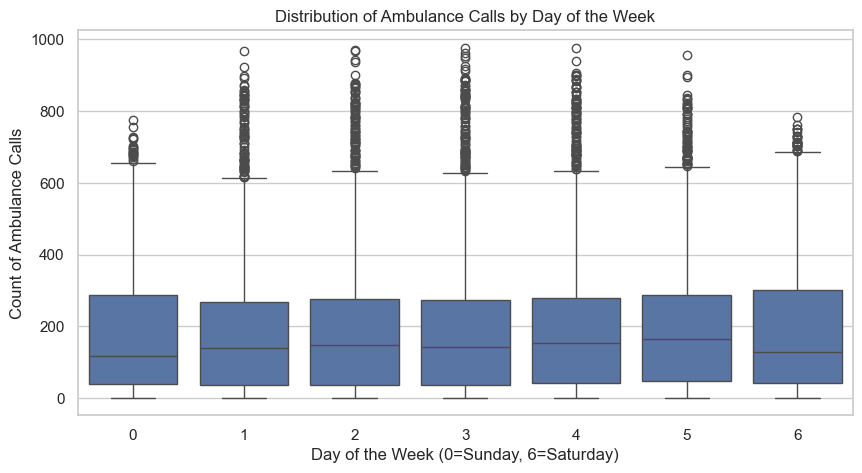

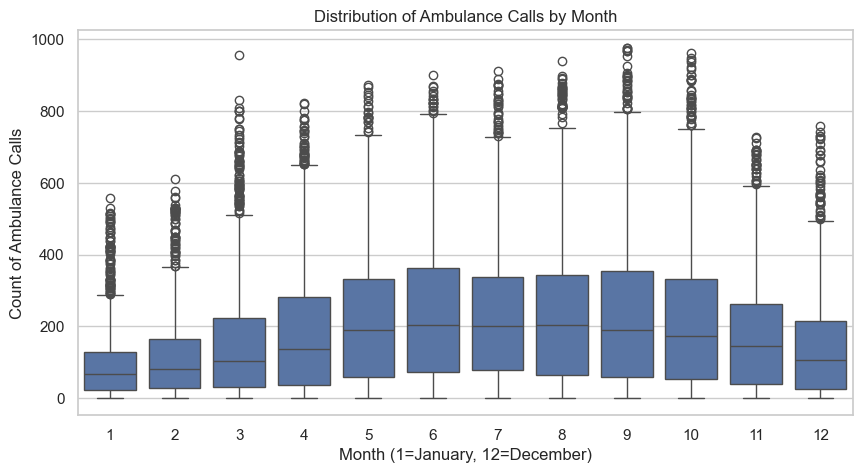

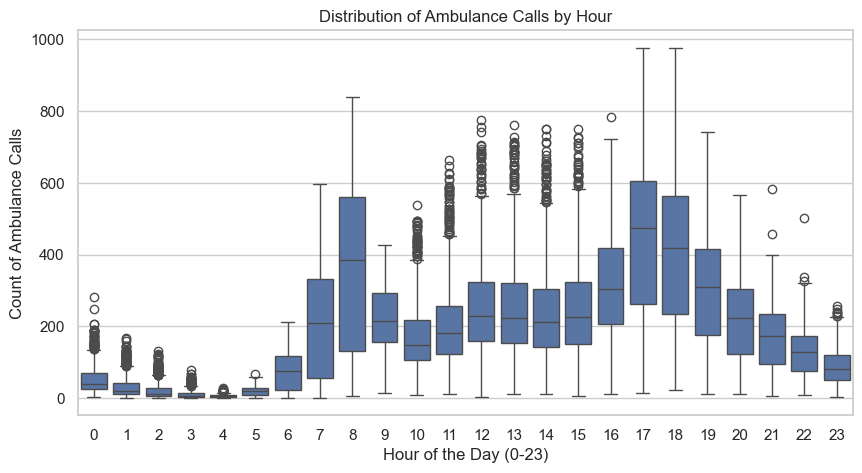

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title('Distribution of Ambulance Calls by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Count of Ambulance Calls')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='mnth', y='cnt', data=data)
plt.title('Distribution of Ambulance Calls by Month')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Count of Ambulance Calls')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='hr', y='cnt', data=data)
plt.title('Distribution of Ambulance Calls by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Count of Ambulance Calls')
plt.show()

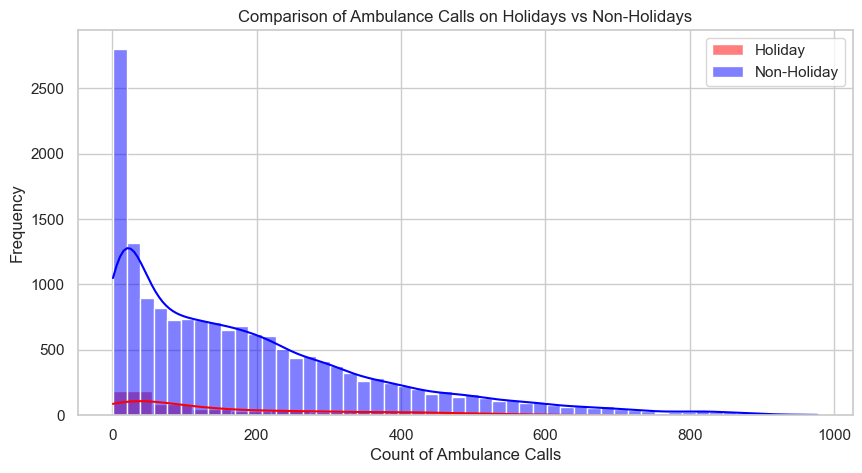

In [ ]:
holiday_calls = data[data['holiday'] == 1]['cnt']
non_holiday_calls = data[data['holiday'] == 0]['cnt']

plt.figure(figsize=(10, 5))
sns.histplot(holiday_calls, color='red', label='Holiday', kde=True)
sns.histplot(non_holiday_calls, color='blue', label='Non-Holiday', kde=True)
plt.title('Comparison of Ambulance Calls on Holidays vs Non-Holidays')
plt.xlabel('Count of Ambulance Calls')
plt.ylabel('Frequency')
plt.legend()
plt.show()

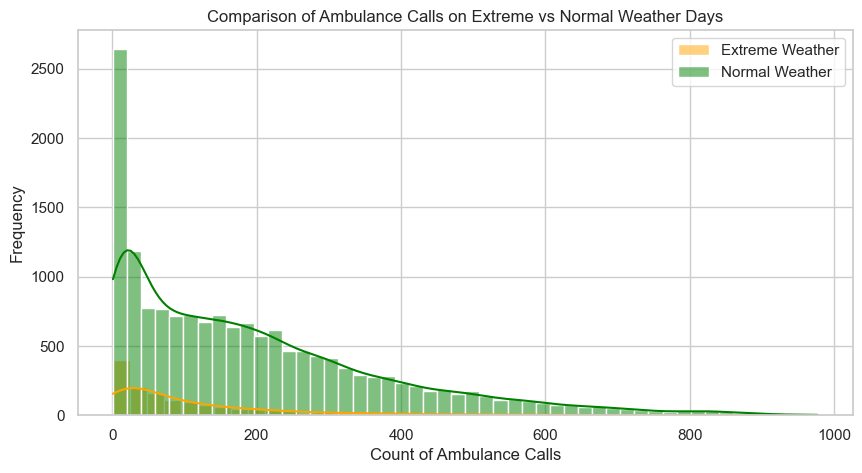

In [ ]:
extreme_weather_calls = data[data['weathersit'] >= 3]['cnt']
normal_weather_calls = data[data['weathersit'] < 3]['cnt']

plt.figure(figsize=(10, 5))
sns.histplot(extreme_weather_calls, color='orange', label='Extreme Weather', kde=True)
sns.histplot(normal_weather_calls, color='green', label='Normal Weather', kde=True)
plt.title('Comparison of Ambulance Calls on Extreme vs Normal Weather Days')
plt.xlabel('Count of Ambulance Calls')
plt.ylabel('Frequency')
plt.legend()
plt.show()

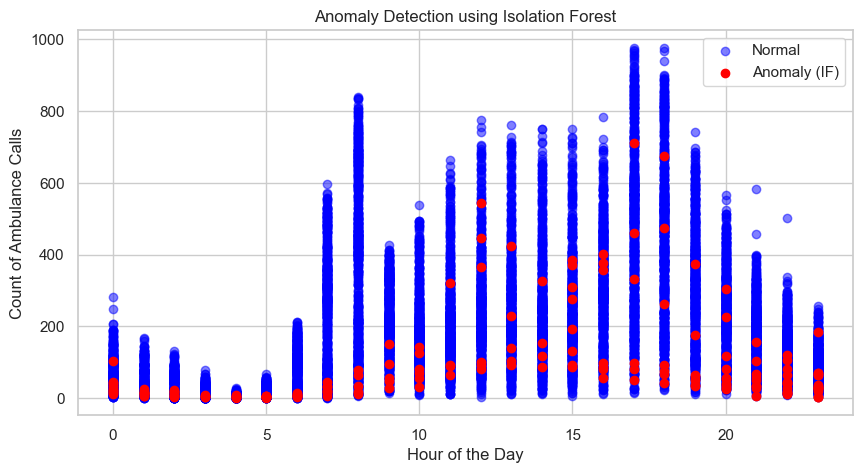

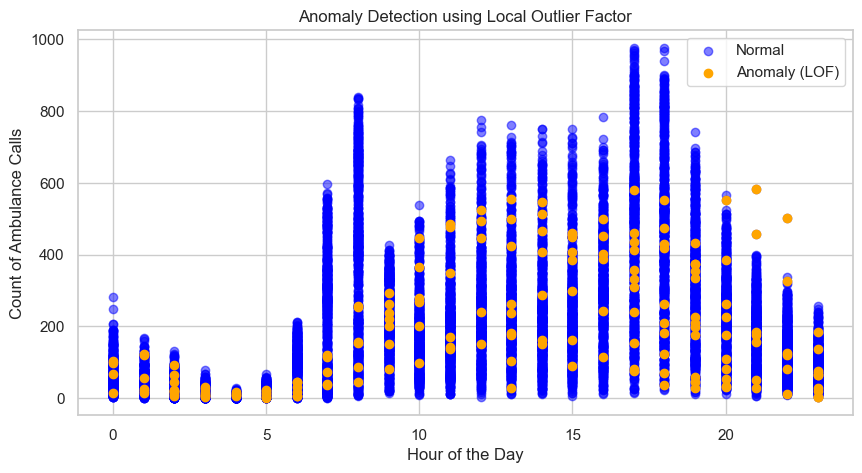

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

isolation_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly_if'] = isolation_forest.fit_predict(X_encoded)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
data['anomaly_lof'] = lof.fit_predict(X_encoded)

anomalies_if = data[data['anomaly_if'] == -1]
anomalies_lof = data[data['anomaly_lof'] == -1]

plt.figure(figsize=(10, 5))
plt.scatter(data['hr'], data['cnt'], alpha=0.5, label='Normal', color='blue')
plt.scatter(anomalies_if['hr'], anomalies_if['cnt'], color='red', label='Anomaly (IF)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Ambulance Calls')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data['hr'], data['cnt'], alpha=0.5, label='Normal', color='blue')
plt.scatter(anomalies_lof['hr'], anomalies_lof['cnt'], color='orange', label='Anomaly (LOF)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Ambulance Calls')
plt.title('Anomaly Detection using Local Outlier Factor')
plt.legend()
plt.show()

**1. Data analysis**

Overview and preparation of the data
We first examined the data, which contains the following basic characteristics:

* Time variables: year, month, day of the week, hour.
* Seasonal and weather variables: season (spring, summer, autumn, winter), temperature, perceived temperature, humidity, wind speed, and weather conditions.
* Events and days: whether the day is a holiday or a working day.

---

**2. Modelling**

Preparing the data for modelling

For regression, we split the data into training and test samples (80% for training and 20% for testing). We used the categorical variable coding method to make the data suitable for machine learning.

**2.2 Selection and training of models**
We selected several regression models to evaluate their performance:

* **Linear regression**
* **Decision tree**
* **Gradient boosting**
* **Random Forest**

**2.3 Evaluation of the models**

For evaluation, we used the Mean Squared Error and R² Score metrics. Here are the results after optimisation:

Linear regression: Worst performance because the model cannot capture complex dependencies.

| **Model**           | **Description**                                         | **MSE** | **R²** |
|----------------------|--------------------------------------------------|---------|--------|
| Decision tree       | Improvements after setting hyperparameters    | 2751    | 0.91   |
| Gradient boosting  | More reliable model                                | 1814    | 0.94   |
| Random Forest       | Better results                            | 1758    | 0.94   |

---

**3. Graphical analysis of the distribution of ambulance calls**

**Distribution of ambulance calls by day of the week:**
* The change in calls during the week, with distinct differences between individual days.

**Distribution of ambulance calls by month:**
* The change in calls over different months, allowing you to observe seasonal trends or anomalies.

**Distribution of ambulance calls by hour of the day:**
* Change the hours of calls, highlighting the peak hours when calls are most frequent and the periods when they decrease.

---

**4. Comparison of ambulance calls on holidays and weekdays**

 * The bar chart compares the number of ambulance calls on holidays with calls on weekdays. Thanks to the use of a smoothing line, you can see how the number of calls changes depending on whether the day is a holiday or a weekday.


**4.1 Comparison of ambulance calls on days with extreme and normal weather conditions**

* The histogram illustrates the difference in the number of ambulance calls during extreme weather compared to normal weather days. The graph demonstrates the impact of weather on call frequency, showing how weather anomalies can lead to changes in the number of calls.

**4.2 Anomaly Detection in Ambulance Call Data**

* The code applies two methods, **Isolation Forest** and **Local Outlier Factor**, to detect unusual patterns  in ambulance call data. Both methods identify data points that deviate significantly from the usual trend.


* Both plots display the number of ambulance calls at different hours of the day, with normal points in blue and anomalies in their respective colors. This helps visually compare how each method identifies anomalies in the data.